### HW4

__a)__

\begin{equation}
I_d = \beta(V_{gs} - V_{th})^2 \\
\beta = \frac{I_{DSS}}{V_{th}^2} \\
g_m = 2\cdot\sqrt{\beta I_D} \\
I_{D} = 2mA, I_G = 2pA, R_D = 4k\Omega,\beta = 24 mA/V^2, V_{gs} - V_{th} = 0.29V
\end{equation}

\begin{equation}
G = g_m ( R_D || r_o) \approx g_m R_D
\end{equation}

In [1]:
import numpy as np

q = 1.602e-19
kT = 1.38e-23*300

I_D = 2e-3
I_G = 2e-12
R_D = 4e3
beta = 24e-3
V_gs_th = 0.29

g_m = 2 * np.sqrt(beta * I_D)

I_d = beta * V_gs_th ** 2
G = g_m * R_D

# R_D thermal voltage noise, input refer by /G
e2_nR_D = 4 * kT * R_D

# i_nd channel thermal current noise turns into voltage noise via R_D, input refer by /G
i2_nd = 4 * kT * g_m * 2 / 3
e2_nd = i2_nd * R_D**2

e2_n = (e2_nR_D + e2_nd) / G**2

# i_ng gate current shot noise
i2_ng = 2 * q * I_G
i2_n = i2_ng

display(f'e_n {np.sqrt(e2_n)} i_n {np.sqrt(i2_n)}')

'e_n 9.046026041758245e-10 i_n 8.004998438475799e-16'

__b)__
\begin{equation}
i_{nf}^2 = \frac{K_f\cdot I_D}{f} \\
K_f = 0.0021 fA
\end{equation}

\begin{equation}
i^2_{nd} = 4kTg_m \frac{2}{3}
\end{equation}

\begin{equation}
\frac{K_f\cdot I_D}{f} = 4kTg_m \frac{2}{3} \\
\frac{K_f\cdot I_D}{4kTg_m \frac{2}{3}} = f
\end{equation}

In [2]:
K_f = 0.0021e-15

f_c = K_f * I_D / (4 * kT * g_m * 2 / 3)

f_c

27.4555155185284

'e_nf(100Hz)=4.677071733467426e-10'

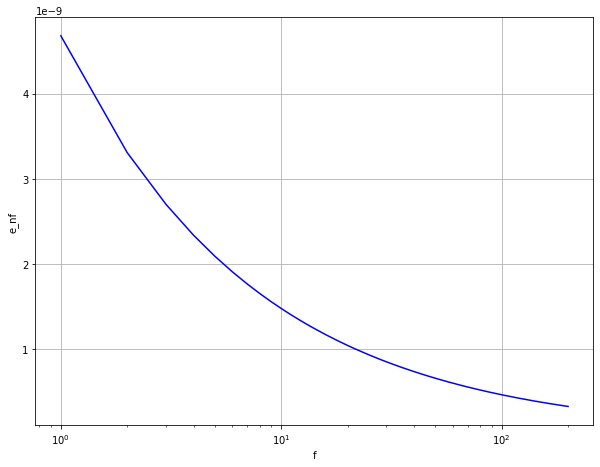

In [4]:
from matplotlib import pyplot as plt
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogx(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
f = np.linspace(1, 200, num=200)
i_nf = np.sqrt(K_f * I_D/f)/g_m
plot_xlogy(f, i_nf, "f", "e_nf")

display(f'e_nf(100Hz)={np.sqrt(K_f * I_D/100)/g_m}')

__c)__

In [ ]:
R_S = 100e3
f = 100
G2 = G**2
gamma = 2/3
R_D2 = R_D**2
R_S2 = R_S**2
g_m2 = g_m**2

# R_D thermal voltage noise, input refer by /G
e2_nR_D = 4 * kT * R_D / G2

# i_nd channel thermal current noise turns into voltage noise via R_D, input refer by /g_m
e2_nd = 4 * kT * gamma / g_m

# i_ng gate current shot noise turns into voltage noise via R_S
i2_ng = 2 * q * I_G
e2_ng = i2_ng * R_S2

# frequency dependent flicker noise, turns into voltage noise via R_D, input refer by /G
i2_nf = K_f * I_D / f
e2_nf = i2_nf / g_m2

e2_n = e2_nR_D + e2_nd + e2_ng + e2_nf

gain = 20 * np.log10(G)

display(f'gain={gain}dB e_n={np.sqrt(e2_n)}')

np.sqrt(e2_nf)

__d)__

In [ ]:
V_out = 10 - I_d * R_D
display(f'I_d {I_d} V_out {V_out}V')


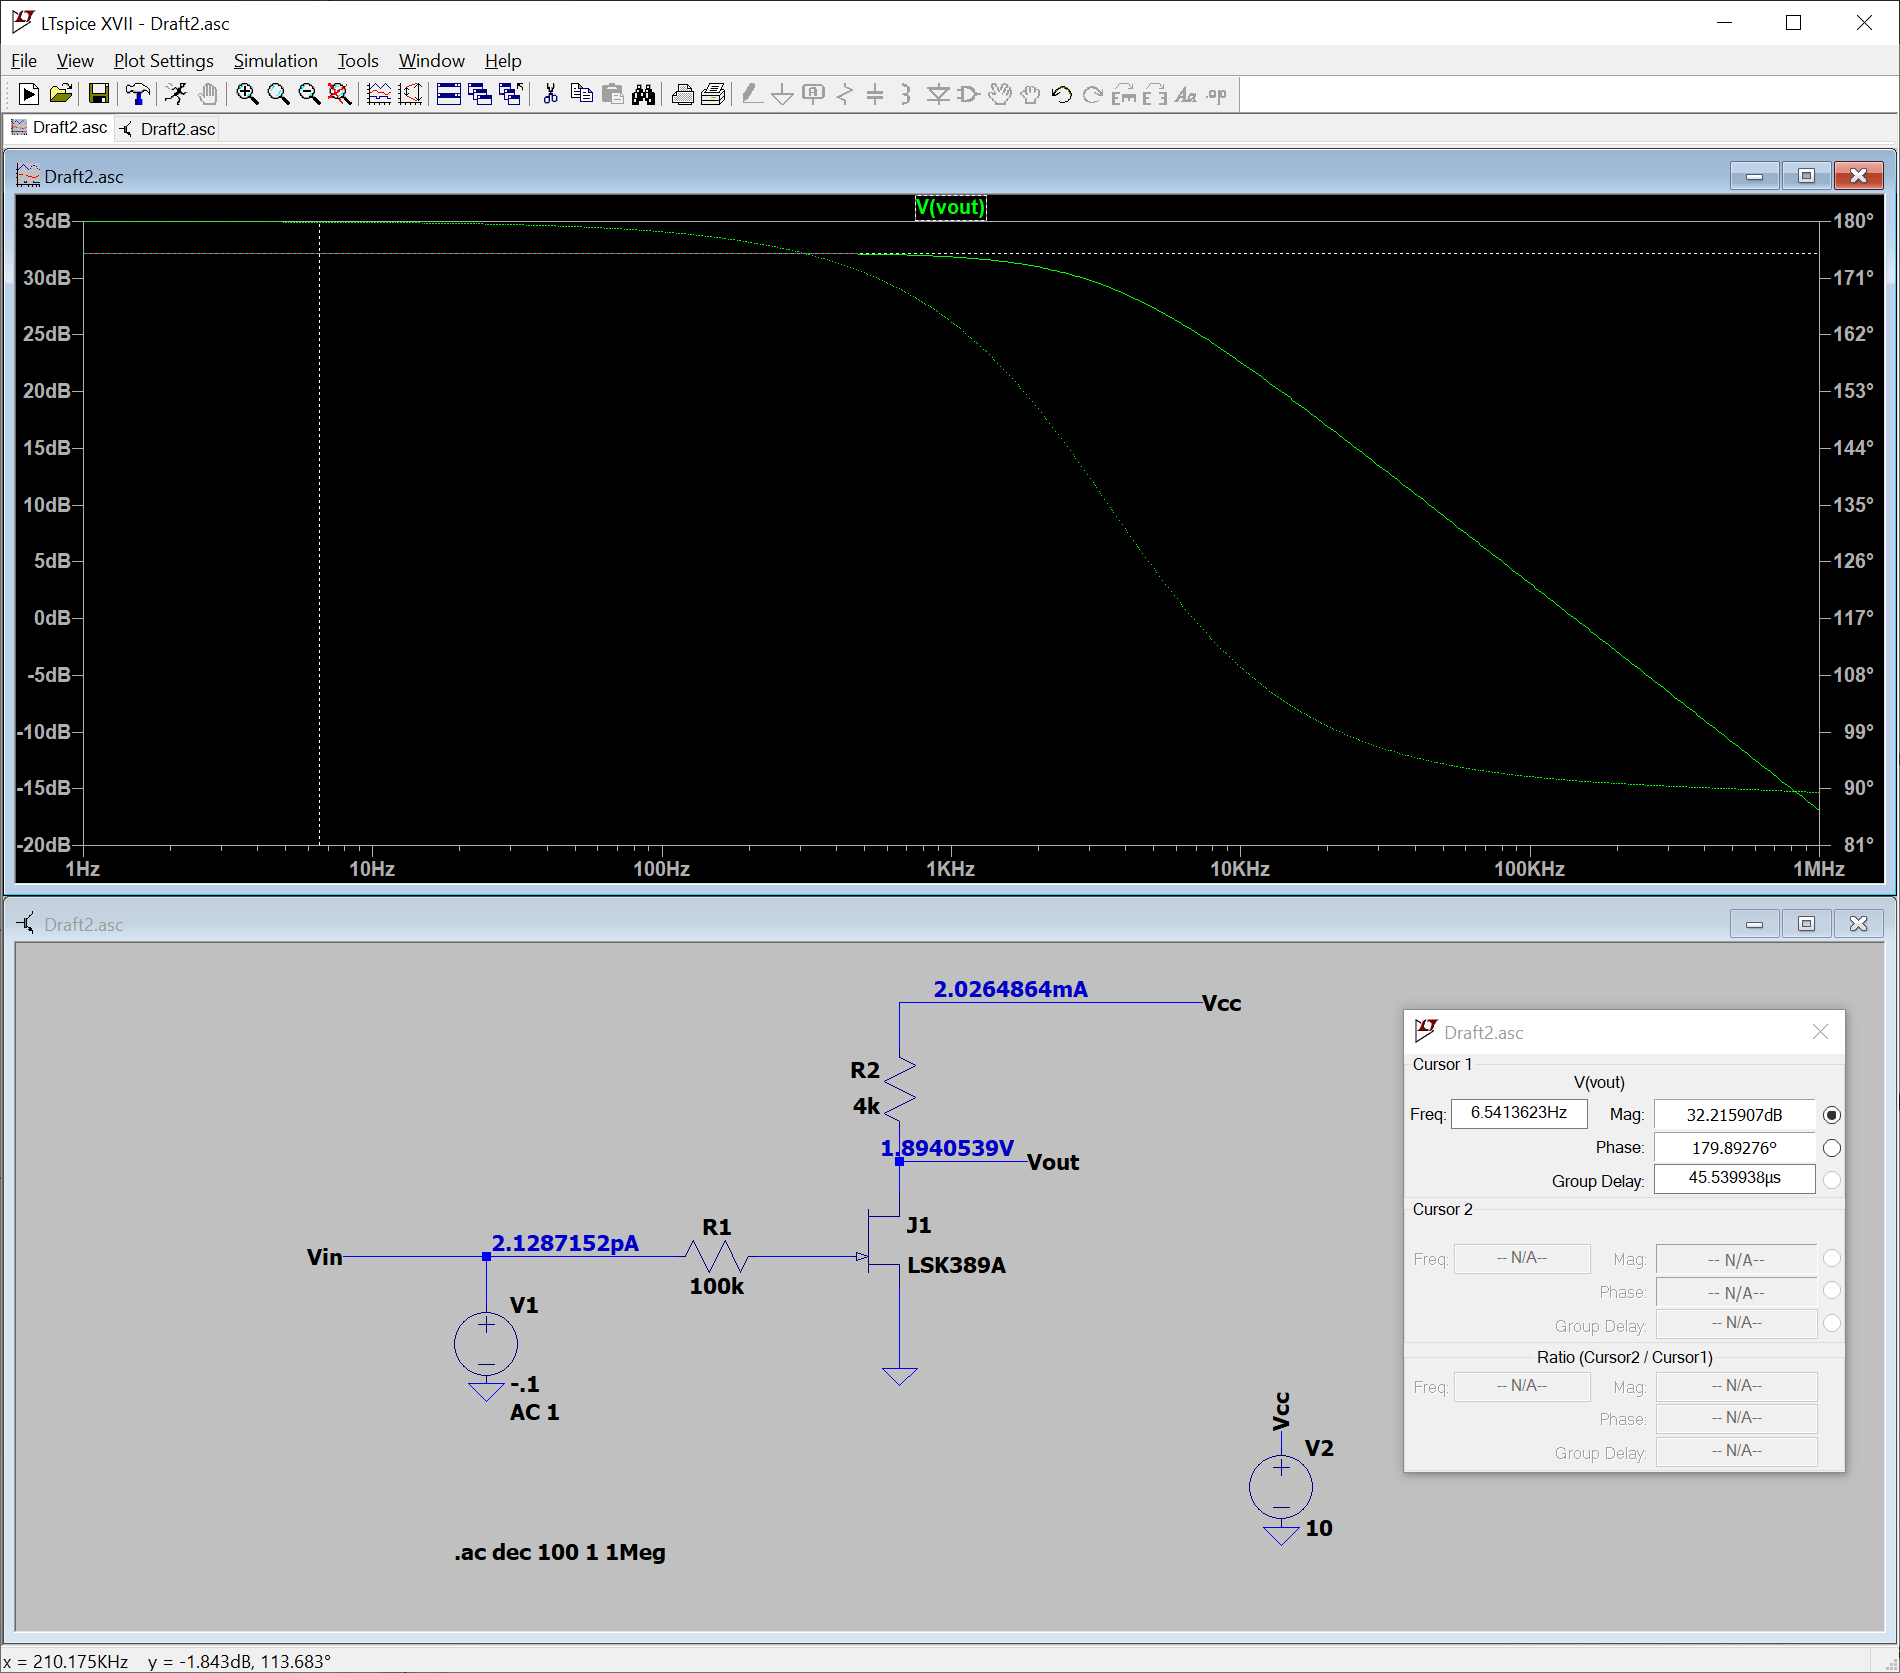